In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

###IMPORT DEI DATI

In [20]:
df = pd.read_csv("life.csv") 

In [21]:
df.head()

,Unnamed: 0,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
1,2139,Russian Federation,2011,Developing,69.4,242.0,14,11.04,184.764931,97.0,...,97.0,6.61,97.0,0.3,14212.68700,14296868.0,2.3,2.4,0.785,14.0
2,1889,Niger,2003,Developing,52.1,28.0,56,0.10,20.268766,NaN,...,44.0,6.23,41.0,1.6,215.85480,1265687.0,12.3,12.2,0.266,3.0
3,2773,United Kingdom of Great Britain and Northern I...,2004,Developed,78.8,83.0,4,12.22,0.000000,NaN,...,92.0,7.98,92.0,0.1,NaN,NaN,0.7,0.5,NaN,NaN
4,1338,Jordan,2007,Developing,73.0,12.0,4,0.60,373.262864,98.0,...,98.0,8.35,98.0,0.1,2762.86354,6193191.0,3.8,3.8,0.736,13.6


In [22]:
df = df.drop('Unnamed: 0', axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2497 non-null   object 
 1   Year                             2497 non-null   int64  
 2   Status                           2497 non-null   object 
 3   Life expectancy                  2488 non-null   float64
 4   Adult Mortality                  2488 non-null   float64
 5   infant deaths                    2497 non-null   int64  
 6   Alcohol                          2333 non-null   float64
 7   percentage expenditure           2497 non-null   float64
 8   Hepatitis B                      2025 non-null   float64
 9   Measles                          2497 non-null   int64  
 10   BMI                             2470 non-null   float64
 11  under-five deaths                2497 non-null   int64  
 12  Polio               

In [ ]:
df.describe().T

In [24]:
#controllo quanti Nan
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      9
Adult Mortality                      9
infant deaths                        0
Alcohol                            164
percentage expenditure               0
Hepatitis B                        472
Measles                              0
 BMI                                27
under-five deaths                    0
Polio                               15
Total expenditure                  190
Diphtheria                          15
 HIV/AIDS                            0
GDP                                387
Population                         559
 thinness  1-19 years               27
 thinness 5-9 years                 27
Income composition of resources    144
Schooling                          141
dtype: int64

In [25]:
### sostituire nan con 0
df = df.fillna(0)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,0.00,0.000000,87.0,0,...,87.0,0.00,87.0,0.1,0.000000,0.0,1.6,1.5,0.769,14.3
1,Russian Federation,2011,Developing,69.4,242.0,14,11.04,184.764931,97.0,629,...,97.0,6.61,97.0,0.3,14212.687000,14296868.0,2.3,2.4,0.785,14.0
2,Niger,2003,Developing,52.1,28.0,56,0.10,20.268766,0.0,54190,...,44.0,6.23,41.0,1.6,215.854800,1265687.0,12.3,12.2,0.266,3.0
3,United Kingdom of Great Britain and Northern I...,2004,Developed,78.8,83.0,4,12.22,0.000000,0.0,189,...,92.0,7.98,92.0,0.1,0.000000,0.0,0.7,0.5,0.000,0.0
4,Jordan,2007,Developing,73.0,12.0,4,0.60,373.262864,98.0,41,...,98.0,8.35,98.0,0.1,2762.863540,6193191.0,3.8,3.8,0.736,13.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,Kiribati,2011,Developing,65.5,26.0,0,0.53,30.467039,95.0,0,...,95.0,1.42,99.0,0.1,1692.613277,14656.0,0.1,0.1,0.585,11.9
2493,Brazil,2011,Developing,74.1,152.0,51,7.58,1084.999766,98.0,43,...,98.0,8.90,99.0,0.1,13167.472890,198686688.0,2.9,2.8,0.724,14.0
2494,Egypt,2005,Developing,69.4,174.0,56,0.16,0.000000,98.0,77,...,98.0,5.60,98.0,0.1,0.000000,0.0,3.2,3.2,0.629,11.4
2495,Saint Lucia,2003,Developing,72.2,171.0,0,12.55,0.000000,84.0,0,...,91.0,6.10,9.0,0.2,0.000000,0.0,4.4,4.4,0.684,12.4


In [ ]:
#controllo quanti Nan
df.isnull().sum()

###TRAIN/TEST SPLIT

In [28]:
### train/test split
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.25, shuffle=True, random_state=22)

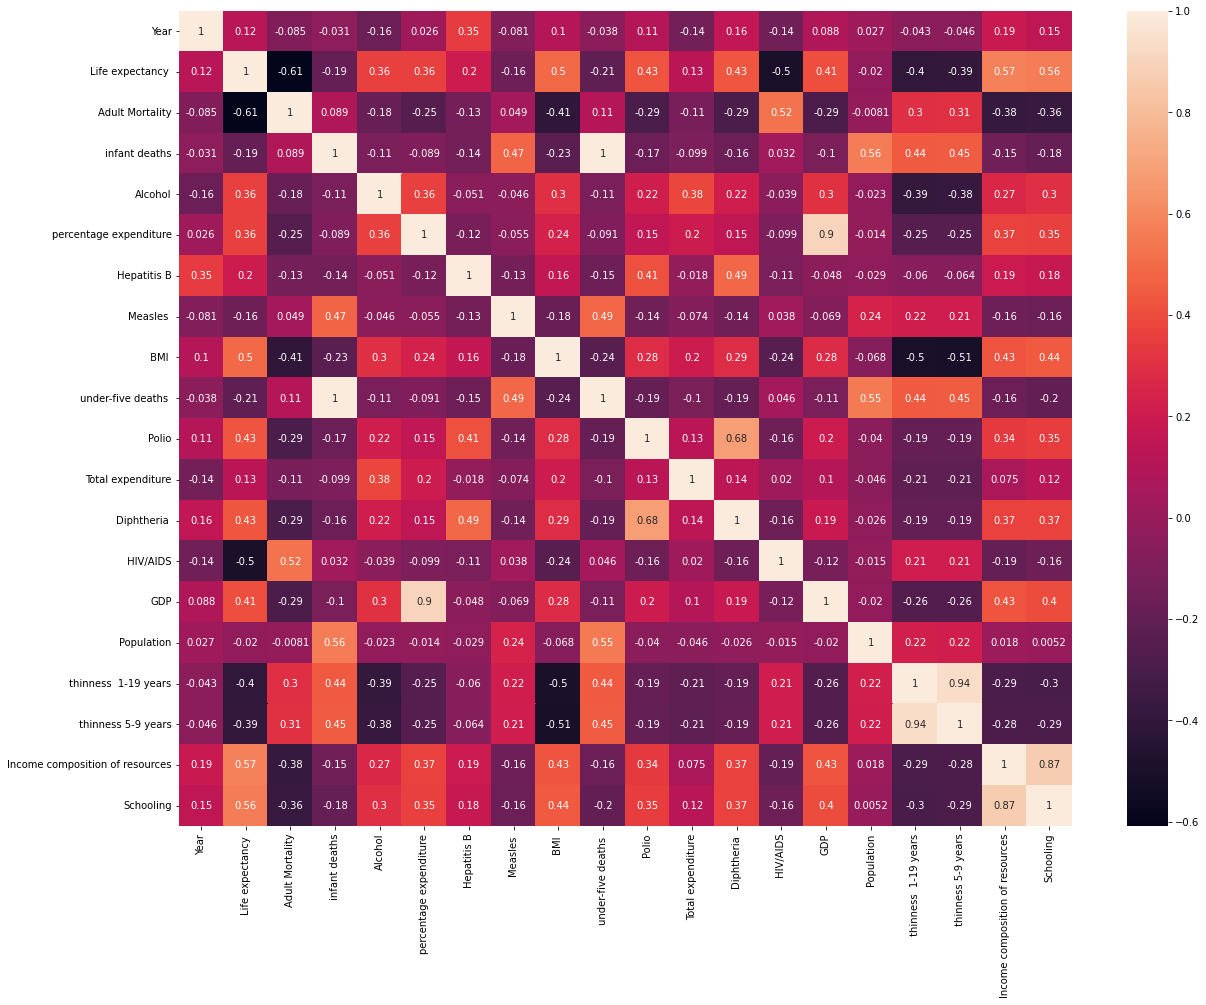

In [27]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True);

In [ ]:
### target
target_name = 'Life expectancy '
sns.displot(train_df[target_name])

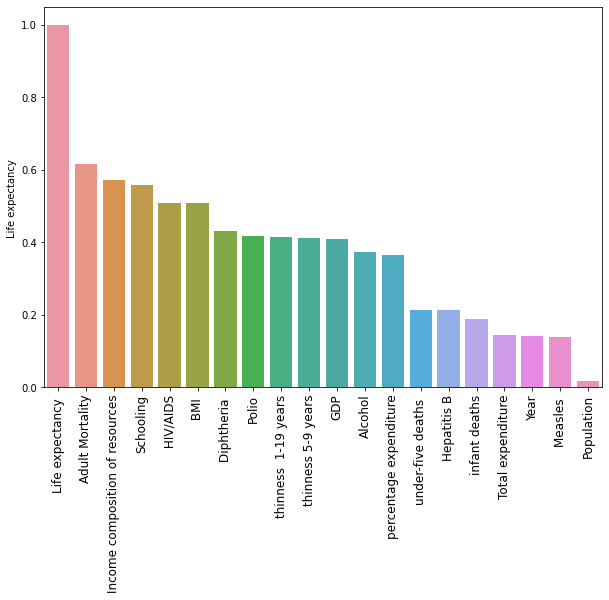

In [32]:
corr_matrix = train_df.corr()
sale_corr = corr_matrix[target_name].abs().sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=sale_corr.index, y=sale_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [33]:
categorical_features = train_df[[col for col in train_df.columns if train_df[col].dtype==object]].columns

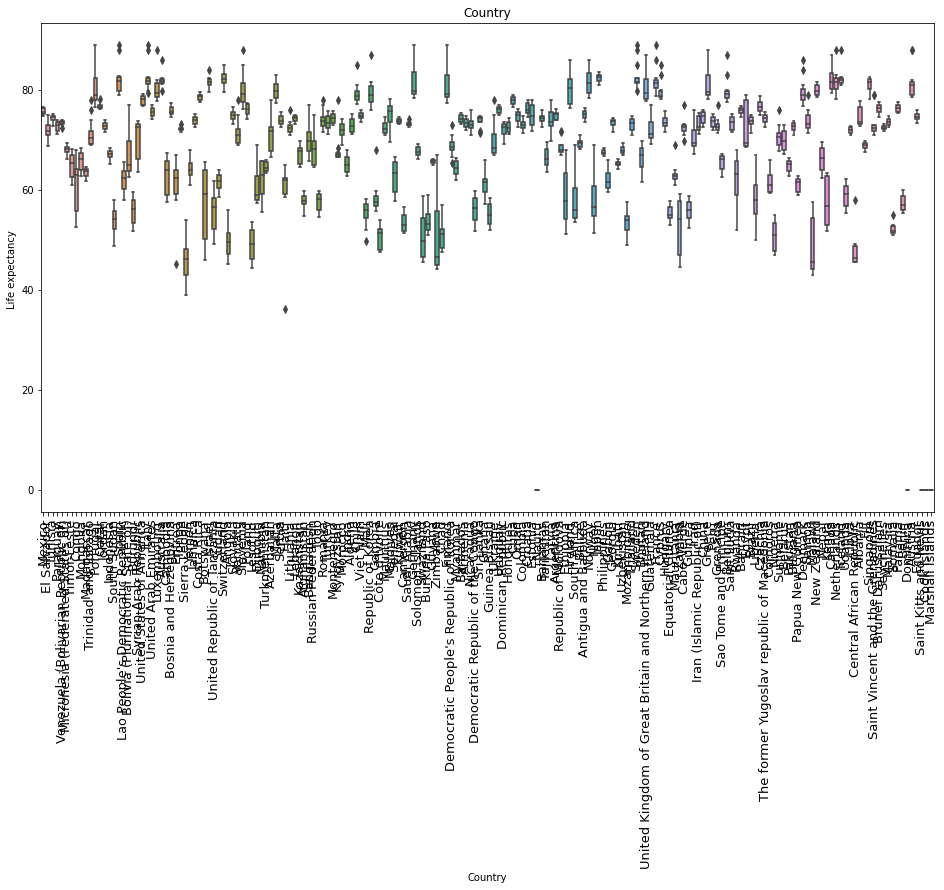

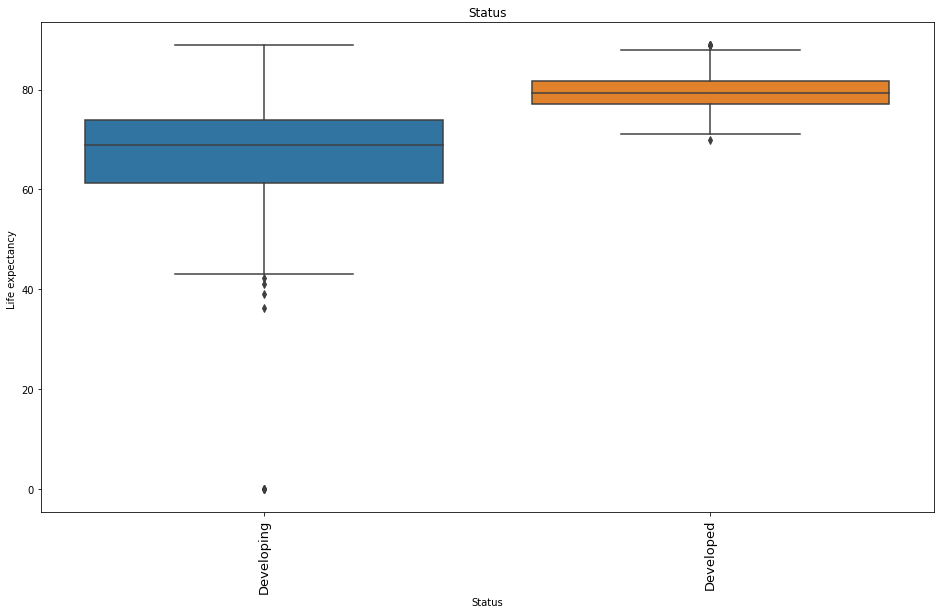

In [34]:
### Metto in relazione categorical features/ Target

for feature in categorical_features:
  plt.figure(figsize=(16,9))
  sns.boxplot(x=feature, y=target_name, data=train_df)
  plt.title(feature)
  plt.xticks(rotation=90, fontsize=13);

In [35]:
### fitting
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model = model.fit(train_df.drop([target_name]+list(categorical_features), axis=1), train_df[target_name])

In [36]:
importances = pd.Series(model.feature_importances_, index=model.feature_names_in_).sort_values(ascending=False)

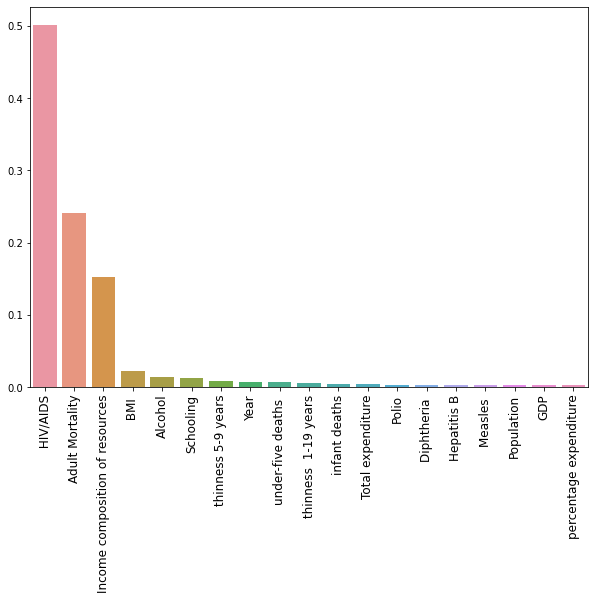

In [37]:
plt.figure(figsize=(10,7))
sns.barplot(x=importances.index, y=importances)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [46]:
# separating features and target
X_ = df["Schooling","Income composition of resources","Adult Mortality"]
y = df['Life expectancy ']

KeyError: ignored

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)

X = standardized_data

ValueError: ignored